# Correction for the main exercise about $\chi^2$ with covariance matrix


### Visualisation of the data

**1)** Read the file 'Points_chi2_example_cov.txt' which contain X and Y array (10 points each array)

**2)** Read the file 'Covariance_chi2_example_cov.txt' which contain covariance matrix

**3)** Plot Y vs X with marker and no line. Do a pcolormesh of the covariance matrix.

**4)** Use the diagonal terms of the covariance matrix as the variance of each 10 Y points and draw plot the same plot as in **3)** but with error bars (have to be the square root of the variance ;) )

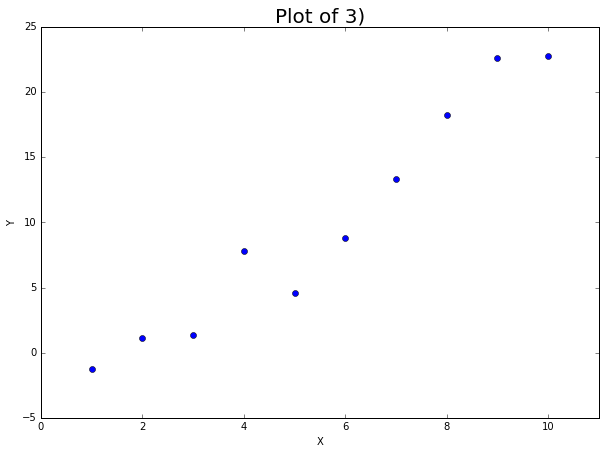

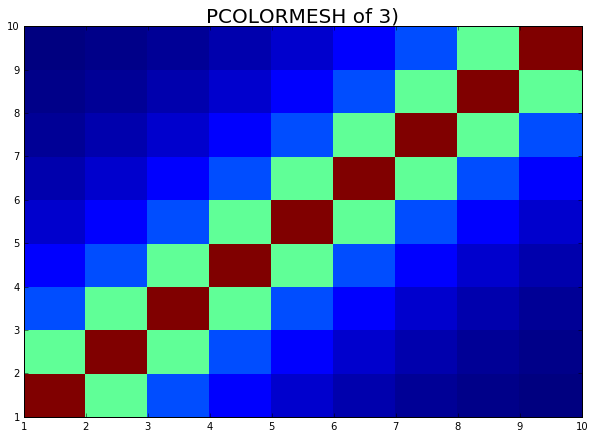

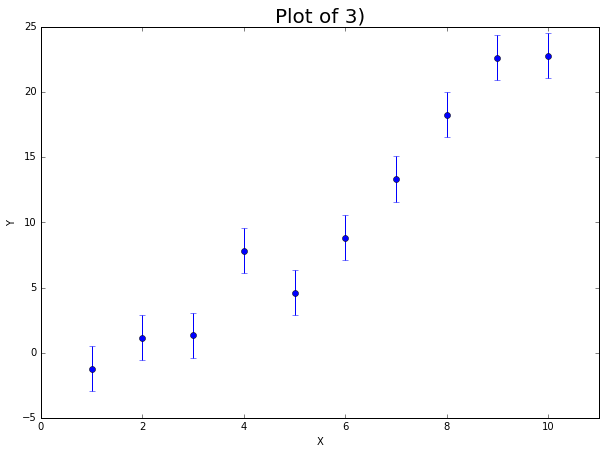

In [47]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

name_file_points = 'Points_chi2_example_cov.txt'
name_file_cov = 'Covariance_chi2_example_cov.txt'

X, Y = np.loadtxt(name_file_points).T
Cov_mat = np.loadtxt(name_file_cov).T


plt.figure(figsize=(10,7))
plt.plot(X,Y, linestyle ='none', marker = 'o')
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim( (0,11) )
plt.title('Plot of 3)', fontsize=20)
plt.show()

##### pcolormesh of the covariance matrix

plt.figure(figsize=(10,7))
plt.pcolormesh(X,X, Cov_mat)
plt.title('PCOLORMESH of 3)', fontsize=20)
plt.show()



##### Take the Cov[ii,ii] as the variance

var_arr = np.zeros( len(X) )

for ii in range(len(X)):
    var_arr[ii] = Cov_mat[ii, ii]

    
plt.figure(figsize=(10,7))
plt.errorbar(X,Y, np.sqrt(var_arr) , linestyle ='none', marker = 'o')
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim( (0,11) )
plt.title('Plot of 3)', fontsize=20)
plt.show()



### Prepare to fit

**5)** Create 2 arrays, named **A_arr** and **B_arr**, of values spaced by 0.1 between -6 and 4 

**6)** Generate a 2D-array, named **chi2_arr**, full of 0. with size (len(A_arr), len(B_arr))

**7)** Using a double loop, evluate at each point of the **chi2_arr[ii,jj]** the value of the $\chi^2 = \frac{1}{2} \vec{V}^T Cov^{-1} \vec{V}$  where $\vec{V}$ is the array of 10 elements (A_arr[ii] * X + B_arr[jj] - Y)

**8)** Find the best fit parameters ($A_{best}, B_{best}$) which correspond to the minimum of **chi2_arr**

**9)** Plot one more time X,Y with errorbar() and add the best fit model


Best fit for A =  2.8
Best fit for B =  -5.3


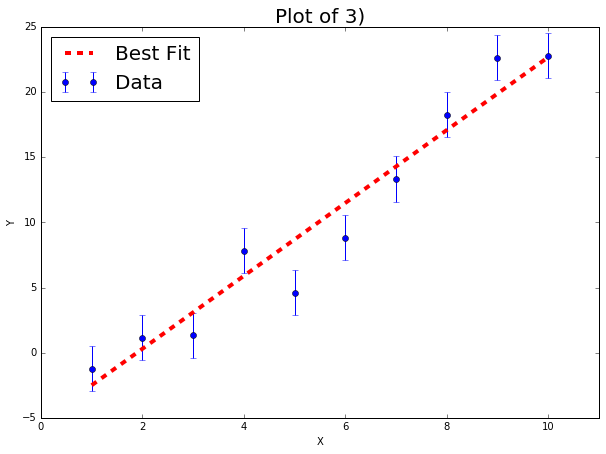

In [87]:
#### 6)

A_arr = np.linspace(-6., 4., 101)
B_arr = np.linspace(-6., 4., 101)


#### 7)

chi2_arr = np.zeros( (len(A_arr) , len(B_arr) ) )

#### 8)

Cov_mat = np.matrix(Cov_mat)
Cov_inv = Cov_mat.I
#Cov_inv =  np.linalg.inv(Cov_mat)

#print (np.dot(Cov_mat , vec_noise.T))[0]

for ii in range(len(A_arr)):
    for jj in range(len(B_arr)):
        
        vec_arr = A_arr[ii] * X + B_arr[jj] - Y
        #vec_int = (np.dot(Cov_mat , vec_arr.T)).reshape(10)
        chi2_arr[ii, jj] =  np.dot( vec_arr , np.dot( Cov_inv , (vec_arr.reshape( len(X),1) ) ) )


        
### find the best parameters 

t_min = np.unravel_index(chi2_arr.argmin(), chi2_arr.shape )   
### return tuple with index A and index B corresponding to the min

print "Best fit for A = ", A_arr[t_min[0]]
print "Best fit for B = ", B_arr[t_min[1]]


plt.figure(figsize= (10,7) )

plt.errorbar(X,Y, np.sqrt(var_arr) , linestyle ='none', marker = 'o', label='Data')
plt.plot(X, A_arr[t_min[0]] * X + B_arr[t_min[1]], linestyle = '--', color='red', lw=4, label='Best Fit' )
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim( (0,11) )
plt.legend(loc=2, fontsize=20)
plt.title('Plot of 3)', fontsize=20)
plt.show()


        

### Confidence contours

One time you have found the best fit, you want to obtain obtain the confidence region. To do that, you have to considerate the $\Delta \chi^2 = \chi^2 - min(\chi^2)$ and consider the values for 2 parameters for $1,2,3\sigma$. 

**10)** Generate a new 2D array, named **Delta_chi2_arr**, equal to **chi2_arr**-np.min(chi2_arr)

**11)** Do a pcolormesh of this new array and add a marker at the best parameters value position

**12)** Using the values for 2 parameters for $1,2,3\sigma$, generate the contour plot for these 3 values. The real values I used to generate the data points are A_real = 2.7 and B_real = -2.3. Add a marker on the contour plot.



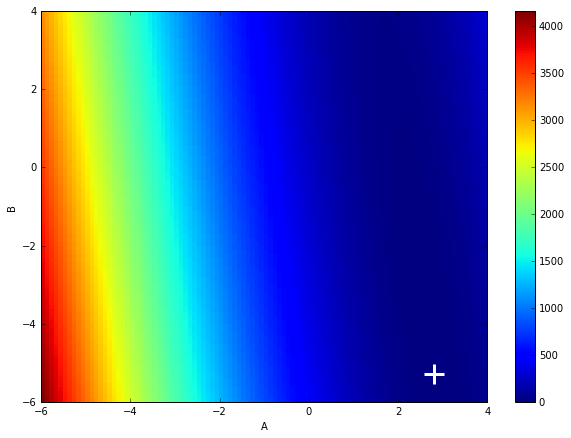

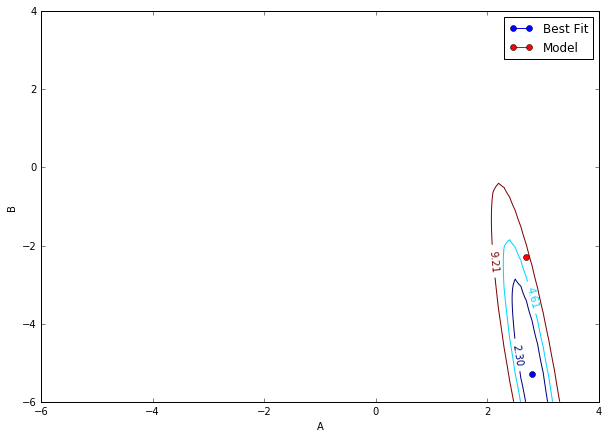

In [88]:
#### 10)
Delta_chi2_arr = chi2_arr - np.min(chi2_arr)




#### 11)

plt.figure(figsize= (10,7) )
plt.pcolormesh(A_arr, B_arr, Delta_chi2_arr.T)
plt.plot( A_arr[t_min[0]], B_arr[t_min[1]], marker = '+', color='white', markersize=20,mew=3)  ### add the marker at best fit spot
plt.xlabel('A')
plt.ylabel('B')
plt.xlim( (-6,4) )
plt.ylim( (-6,4) )
plt.colorbar()     #### add the colorbar
plt.show()




#### 12)


### The real value I used to generate the data are
A_real = 2.7
B_real = -2.3


#Delta chi2 for 2 parameters
val68=2.30
val90=4.61
val99=9.21
levs = np.array([val68, val90, val99])


plt.figure(figsize= (10,7) )
CS = plt.contour( A_arr, B_arr, Delta_chi2_arr.T, levs , labels=['$1\sigma$','$2\sigma$','$3\sigma$'])
plt.clabel(CS, fontsize=10, inline=1,fmt = '%1.2f')
plt.plot( A_arr[t_min[0]], B_arr[t_min[1]], marker = 'o', label='Best Fit')
plt.plot( A_real, B_real, marker = 'o', color='red', label='Model')
plt.xlabel('A')
plt.ylabel('B')
plt.xlim( (-6,4) )
plt.ylim( (-6,4) )
plt.legend()
plt.show()
